<a href="https://colab.research.google.com/github/buriihenry/Drugs-Recommendation/blob/master/Drugs_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# reading the data

train = pd.read_csv('drive/My Drive/Projects/drugsComTrain_raw.csv')
test = pd.read_csv('drive/My Drive/Projects/drugsComTest_raw.csv')

# getting the shapes
print("Shape of train :", train.shape)
print("Shape of test :", test.shape)

Shape of train : (161297, 7)
Shape of test : (53766, 7)


In [4]:
train.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [5]:
train.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [6]:
#combining both the train and Test dataset
data=pd.concat([train,test])

#checking the shape
data.shape

(215063, 7)

In [7]:
#checking the sample of new dataset
data.sample(5)

,uniqueID,drugName,condition,review,rating,date,usefulCount
153636,196950,Paroxetine,Social Anxiety Disorde,"""Been on Paxil since 2012. All in all there ha...",9,6-Sep-16,23
3482,45033,Fluoxetine,Anxiety and Stress,"""This medication makes me worthless man, I fee...",1,31-Jan-17,8
47774,105475,Triamcinolone,Dermatitis,"""I used this cream for the first time and with...",1,2-Nov-16,8
53858,110041,Nexplanon,Birth Control,"""Got it in 2014 and just took it out. 2 years ...",5,3-May-16,3
141410,136456,Prazosin,Post Traumatic Stress Disorde,"""I have just started this medicine and it is w...",10,16-Nov-12,23


In [8]:
#describing the data
data.describe()

,uniqueID,rating,usefulCount
count,215063.000000,215063.000000,215063.000000
mean,116039.364814,6.990008,28.001004
std,67007.913366,3.275554,36.346069
min,0.000000,1.000000,0.000000
25%,58115.500000,5.000000,6.000000
50%,115867.000000,8.000000,16.000000
75%,173963.500000,10.000000,36.000000
max,232291.000000,10.000000,1291.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215063 entries, 0 to 53765
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   uniqueID     215063 non-null  int64 
 1   drugName     215063 non-null  object
 2   condition    213869 non-null  object
 3   review       215063 non-null  object
 4   rating       215063 non-null  int64 
 5   date         215063 non-null  object
 6   usefulCount  215063 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 13.1+ MB


In [10]:
#checking for null values
data.isnull().sum()

uniqueID          0
drugName          0
condition      1194
review            0
rating            0
date              0
usefulCount       0
dtype: int64

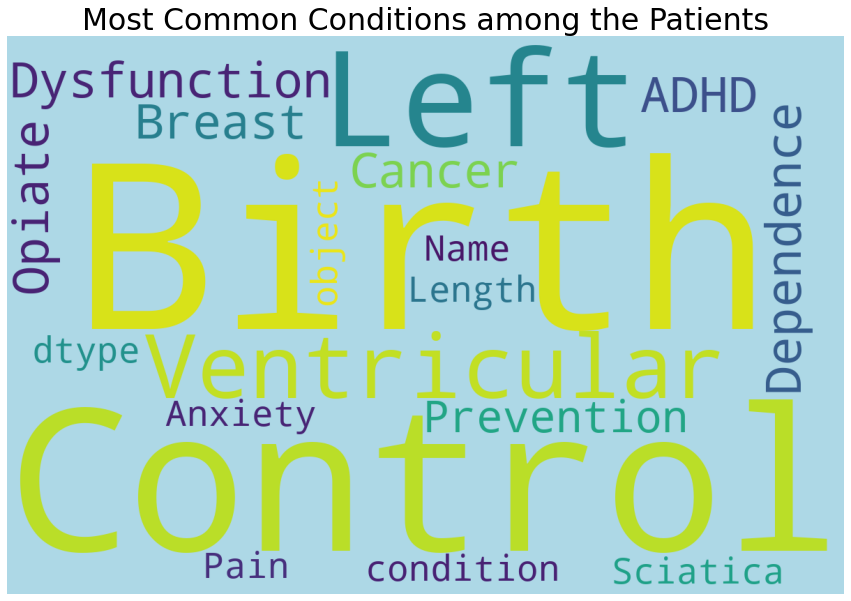

In [11]:
# most common condition 
from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'lightblue', stopwords = stopwords, max_words = 100, width = 1200, height = 800).generate(str(data['condition']))

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Most Common Conditions among the Patients', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

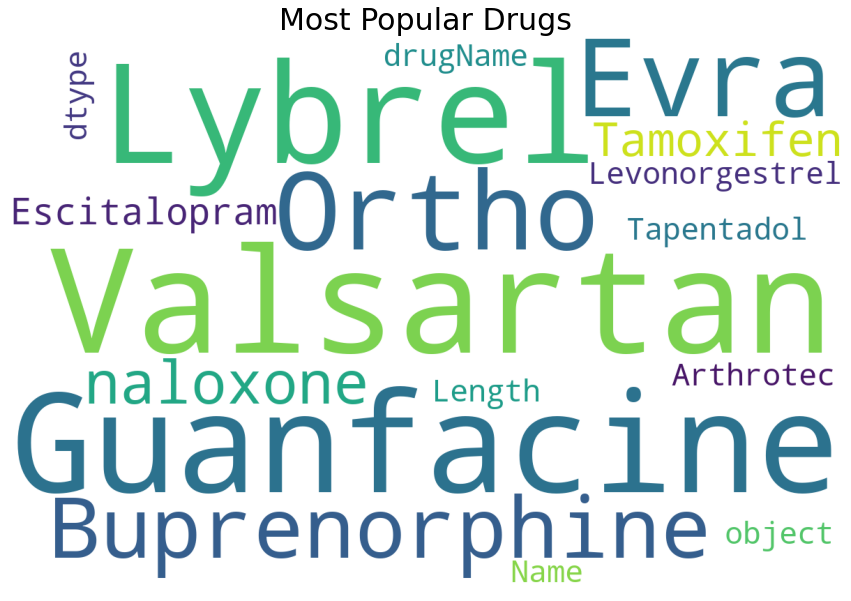

In [12]:
# most popular drugs

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'white', stopwords = stopwords, width = 1200, height = 800).generate(str(data['drugName']))

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Most Popular Drugs', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

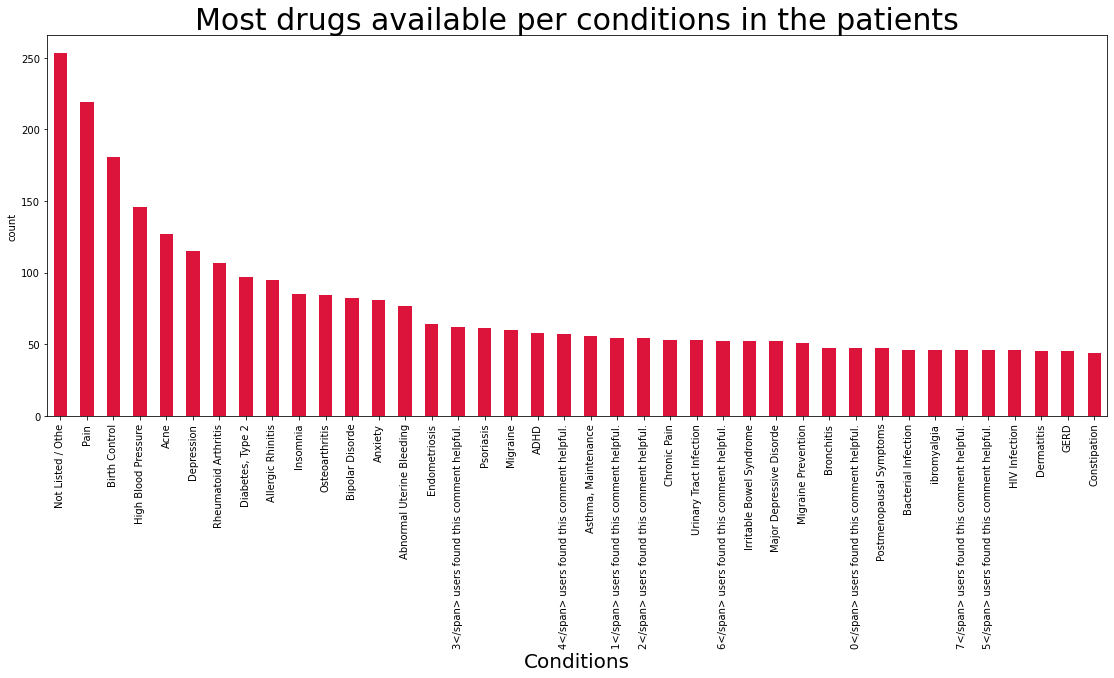

In [13]:
# checking the most popular drugs per conditions
data.groupby(['condition'])['drugName'].nunique().sort_values(ascending=False).head(40).plot.bar(figsize=(19,7),color='crimson')
plt.title('Most drugs available per conditions in the patients', fontsize=30)
plt.xlabel('Conditions',fontsize=20)
plt.ylabel('count')
plt.show()


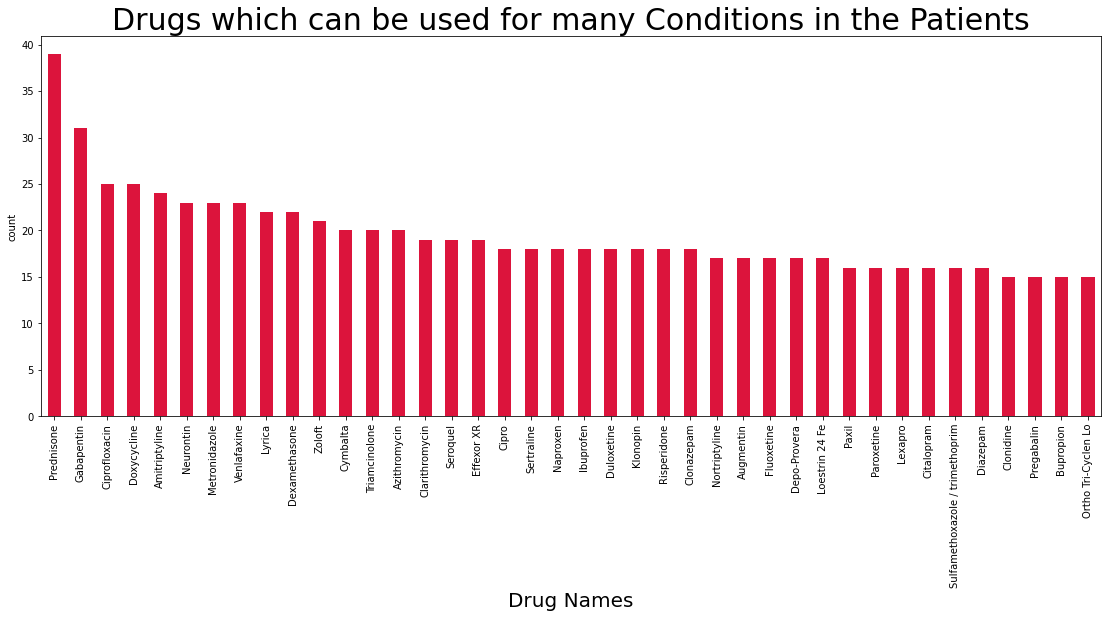

In [14]:
# checking the most popular drugs per conditions
data.groupby(['drugName'])['condition'].nunique().sort_values(ascending=False).head(40).plot.bar(figsize=(19,7),color='crimson')
plt.title('Drugs which can be used for many Conditions in the Patients', fontsize=30)
plt.xlabel('Drug Names',fontsize=20)
plt.ylabel('count')
plt.show()


In [15]:
# let's read some reviews

train['review'][2]

'"I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas."'

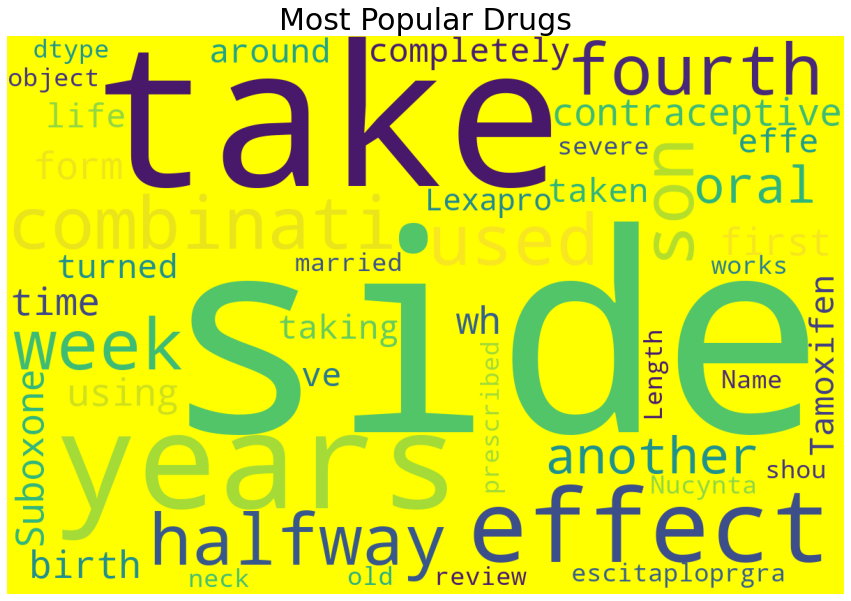

In [16]:
# let's see the words cloud for the reviews 

# most popular drugs

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'yellow', stopwords = stopwords, width = 1200, height = 800).generate(str(data['review']))

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Most Popular Drugs', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [17]:
data['rating'].value_counts()

10    68005
9     36708
1     28918
8     25046
7     12547
5     10723
2      9265
3      8718
6      8462
4      6671
Name: rating, dtype: int64

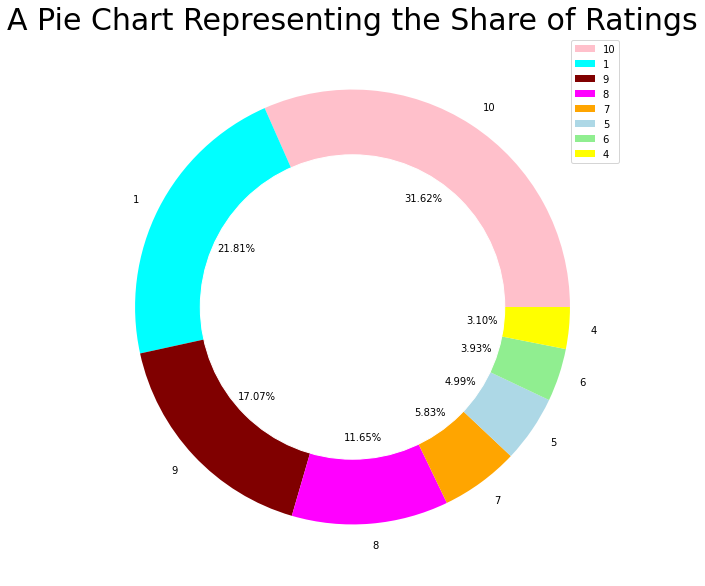

In [18]:
# making a donut chart to rep share of each ratings
size=[68005,46901,36708,25046,12547,10723,8462,6671]
colors=['pink', 'cyan', 'maroon',  'magenta', 'orange', 'lightblue', 'lightgreen', 'yellow']
labels= "10", "1", "9", "8", "7", "5", "6", "4"
my_circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, autopct = '%.2f%%')
plt.axis('off')
plt.title('A Pie Chart Representing the Share of Ratings', fontsize = 30)
p = plt.gcf()
plt.gca().add_artist(my_circle)
plt.legend()
plt.show()

In [19]:
# feature engineering 
# let's make a new column review sentiment 

data.loc[(data['rating'] >= 5), 'Review_Sentiment'] = 1
data.loc[(data['rating'] < 5), 'Review_Sentiment'] = 0

data['Review_Sentiment'].value_counts()

1.0    161491
0.0     53572
Name: Review_Sentiment, dtype: int64

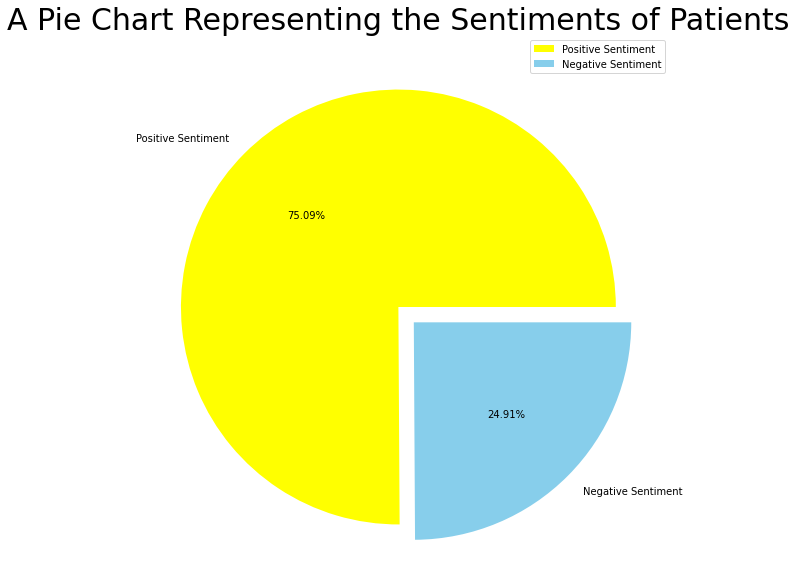

In [20]:
# a pie chart to represent the sentiments of the patients

size = [161491, 53572]
colors = ['yellow', 'skyblue']
labels = "Positive Sentiment","Negative Sentiment"
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, explode = explode, autopct = '%.2f%%')
plt.axis('off')
plt.title('A Pie Chart Representing the Sentiments of Patients', fontsize = 30)
plt.legend()
plt.show()

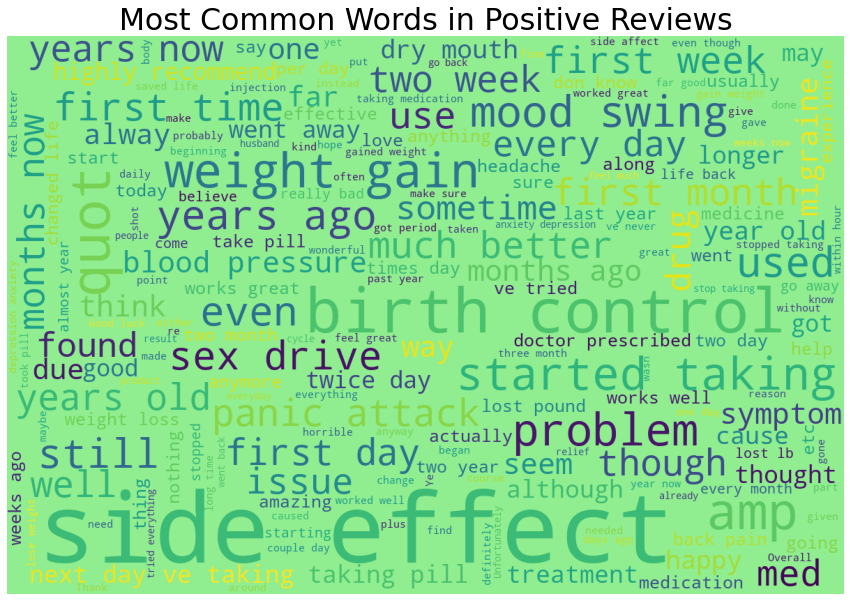

In [25]:
#making Wordclouds for the positive sentiments
positive_sentiments=" ".join([text for text in data['review'][data['Review_Sentiment']==1]])
from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords=set(STOPWORDS)

wordcloud=WordCloud(background_color='lightgreen', stopwords = stopwords, width=1200, height=800).generate(positive_sentiments)

plt.rcParams['figure.figsize']=(15,15)
plt.title('Most Common Words in Positive Reviews',fontsize=30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

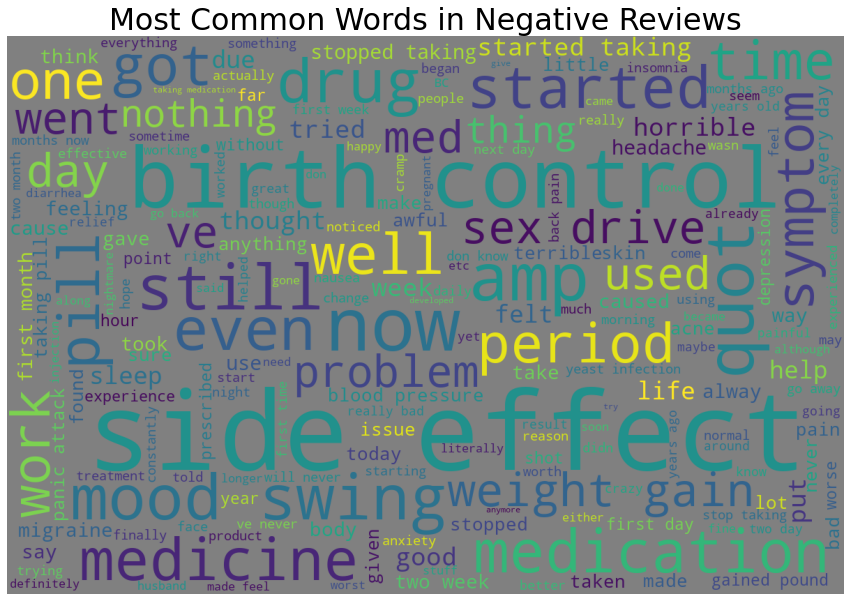

In [26]:
# making wordscloud for the Negative sentiments

negative_sentiments = " ".join([text for text in data['review'][data['Review_Sentiment'] == 0]])

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'grey', stopwords = stopwords, width = 1200, height = 800).generate(negative_sentiments)

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Most Common Words in Negative Reviews', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()